# Week 10-7 OpenAI batch를 활용한 감성 분석-한글

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...  
...                                                  ...  
11374                                           ['좋아요 ']  
11375                                           ['좋아요 ']  
11376                                              ['굿']  
11377                                             ['굿 ']  
11378                                           ['좋아요 ']  

[11379 rows x 6 columns]

In [2]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10599, 6)

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  sentiment  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...          0  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...          0  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...          0  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...          0  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...          0  
...                                                  ...        ...  
11374                                           ['좋아요 ']          1  
11375                                           ['좋아요 ']          1  
11376                                              ['굿']          1  
11377                                             ['굿 ']          1  
11378                                           ['좋아요 ']          1  

[10599 rows x 7 columns]

<AxesSubplot:>

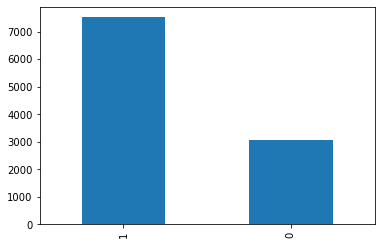

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [5]:
# 성능 평가 함수(앞과 동일)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
# 훈련 데이터, 테스트 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7419,), (3180,))

In [7]:
import pandas as pd

# 훈련 데이터 CSV 저장
train_df = pd.DataFrame({
    "custom_id": [f"train_{i}" for i in range(len(X_train))],
    "text": X_train.values,
    "label": y_train.values  # 1 (positive), 0 (negative)
})
train_df.to_csv("thinq_train_data.csv", index=False, encoding='utf-8-sig')

# 테스트 데이터 CSV 저장
test_df = pd.DataFrame({
    "custom_id": [f"test_{i}" for i in range(len(X_test))],
    "text": X_test.values,
    "label": y_test.values
})
test_df.to_csv("thinq_test_data.csv", index=False, encoding='utf-8-sig')

In [9]:
import json

# 숫자 레이블만 반환하도록 지시하는 시스템 프롬프트
system_prompt = (
    "You are a sentiment classifier. "
    "If the sentiment of the user's message is positive, respond with '1'. "
    "If it is negative, respond with '0'. "
    "Respond with only one digit, no explanation."
)

# OpenAI batch용 입력 파일 생성 함수
def save_openai_batch_input(X, filename, prefix):
    with open(filename, 'w', encoding='utf-8') as f:
        for i, text in enumerate(X):
            item = {
                "custom_id": f"{prefix}_{i}",
                "method": "POST",
                "url": "/v1/chat/completions",
                "body": {
                    "model": "gpt-4o-mini",  # 모델명 변경
                    "messages": [
                        {"role": "system", "content": system_prompt},
                        {"role": "user", "content": text}
                    ]
                }
            }
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

# 훈련/테스트 파일 생성
save_openai_batch_input(X_train, "thinq_train_batch_input.jsonl", "train")
save_openai_batch_input(X_test, "thinq_test_batch_input.jsonl", "test")

In [ ]:
# thinq_test_batch_input 를 OpenAI batch로 입력

In [ ]:
# batch 수행 후

In [12]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
test_df=pd.read_csv("thinq_test_data.csv")

test_df

custom_id                                               text  label
0        test_0  삼성 스마트 띵스의 경우 기기 처음 연결할 때 빼고는 BT랑 WiFi가 지혼자 안켜...      0
1        test_1                                     사용이 직관적이고 편해요.      1
2        test_2                                               Good      1
3        test_3                                 집에 여러 가전 사용하기 편해요~      1
4        test_4  가전제품은 좋은데 씽큐는 쓸모없는 기능의 앱이며 솔직히 에어컨 외부에서 미리켜고 끄...      0
...         ...                                                ...    ...
3175  test_3175                      편리하게 가전기기 휴대폰으로 제어 통제가능해서 좋네요      1
3176  test_3176                           한번씩 끊길때도 있지만 유용하게 잘 씁니다ㅋ      1
3177  test_3177  LG제품을 사랑?하는 사람으로서 잘 쓰고는 있으나, 아쉬운점이 있어 적어봅니다. 이...      1
3178  test_3178                                              편리합니다      1
3179  test_3179                                                 편행      1

[3180 rows x 3 columns]

In [18]:
# batch result를 데이터프레임으로 읽는 함수

import json
import pandas as pd

def load_openai_batch_results(jsonl_path):
    rows = []
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            cid = data.get('custom_id', 'unknown')
            try:
                content = data['response']['body']['choices'][0]['message']['content'].strip()
                rows.append({'custom_id': cid, 'prediction': content})
            except Exception as e:
                # 응답이 없는 경우 또는 구조가 다른 경우
                print(f"[ERROR] {cid}: {e}")
                rows.append({'custom_id': cid, 'prediction': None})
    return pd.DataFrame(rows)

In [19]:
test_result_df = load_openai_batch_results("thinq_test_batch_output.jsonl")

In [20]:
test_result_df

custom_id prediction
0        test_0          0
1        test_1          1
2        test_2          1
3        test_3          1
4        test_4          0
...         ...        ...
3175  test_3175          1
3176  test_3176          1
3177  test_3177          0
3178  test_3178          1
3179  test_3179          0

[3180 rows x 2 columns]

In [23]:
get_clf_eval(test_df['label'],test_result_df['prediction'].astype(int))

오차 행렬
[[ 914    8]
 [ 239 2019]]
정확도: 0.9223, 정밀도: 0.9961, 재현율: 0.8942,    F1: 0.9424, AUC:0.9427


In [30]:
# prompt engineering

import json

# 숫자 레이블만 반환하도록 지시하는 시스템 프롬프트
system_prompt = (
    "You are a social psychologist. "
    "Your task is emotion-based sentiment analysis."
    "Pleas consider Sarcasm and Irony Detection."
    "Please focus on the emotional words"
    "The sourse of data is user reviews of LG Electronics thinq app."
    "If the sentiment of the user's message is positive, respond with '1'. "
    "If it is negative, respond with '0'. "
    "Respond with only one digit, no explanation."
)

# OpenAI batch용 입력 파일 생성 함수
def save_openai_batch_input(X, filename, prefix):
    with open(filename, 'w', encoding='utf-8') as f:
        for i, text in enumerate(X):
            item = {
                "custom_id": f"{prefix}_{i}",
                "method": "POST",
                "url": "/v1/chat/completions",
                "body": {
                    "model": "gpt-4o-mini",  # 모델명 변경
                    "messages": [
                        {"role": "system", "content": system_prompt},
                        {"role": "user", "content": text}
                    ]
                }
            }
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

# 훈련/테스트 파일 생성
save_openai_batch_input(X_train, "thinq_train_batch_input_1.jsonl", "train")
save_openai_batch_input(X_test, "thinq_test_batch_input_1.jsonl", "test")

In [ ]:
# batch 수행

In [31]:
test_result_1_df = load_openai_batch_results("thinq_test_batch_output_1.jsonl")

In [32]:
test_result_1_df

custom_id prediction
0        test_0          0
1        test_1          1
2        test_2          1
3        test_3          1
4        test_4          0
...         ...        ...
3175  test_3175          1
3176  test_3176          1
3177  test_3177          0
3178  test_3178          1
3179  test_3179          0

[3180 rows x 2 columns]

In [33]:
test_df

custom_id                                               text  label
0        test_0  삼성 스마트 띵스의 경우 기기 처음 연결할 때 빼고는 BT랑 WiFi가 지혼자 안켜...      0
1        test_1                                     사용이 직관적이고 편해요.      1
2        test_2                                               Good      1
3        test_3                                 집에 여러 가전 사용하기 편해요~      1
4        test_4  가전제품은 좋은데 씽큐는 쓸모없는 기능의 앱이며 솔직히 에어컨 외부에서 미리켜고 끄...      0
...         ...                                                ...    ...
3175  test_3175                      편리하게 가전기기 휴대폰으로 제어 통제가능해서 좋네요      1
3176  test_3176                           한번씩 끊길때도 있지만 유용하게 잘 씁니다ㅋ      1
3177  test_3177  LG제품을 사랑?하는 사람으로서 잘 쓰고는 있으나, 아쉬운점이 있어 적어봅니다. 이...      1
3178  test_3178                                              편리합니다      1
3179  test_3179                                                 편행      1

[3180 rows x 3 columns]

In [34]:
get_clf_eval(test_df['label'],test_result_1_df['prediction'].astype(int))

오차 행렬
[[ 914    8]
 [ 263 1995]]
정확도: 0.9148, 정밀도: 0.9960, 재현율: 0.8835,    F1: 0.9364, AUC:0.9374


In [ ]:
# few-shot learning

In [37]:
train_df.head(10)

custom_id                                               text  label
0   train_0                                                편해요      1
1   train_1                                                  굿      1
2   train_2  원격제어도 안되고 단순 알림정도의 기능입니다 와이파이 연결도 오래걸리구 과정이 어렵...      0
3   train_3                                     편하고 쉽게 설명되어 있음      1
4   train_4  앱관리 똥망이네요 용량도 어마무시 한 데다가 작동도 안 돼고ㅜ 우리집 반려견보다 못하네요      0
5   train_5  다운받아서 사용해보려 했더니 앱실행이 안되요. com.lgeha.nuts가 중지되었...      0
6   train_6  세탁기도 겨우연결했고, 에어컨할라니까 안됨. 와이파이 계속팅김 제대로 좀 만듭시다....      0
7   train_7                                        리모콘 개뿔.....      0
8   train_8                                                  굿      1
9   train_9  정수기랑 건조기에 기능이 있어도 안쓰다가 이번에 세탁기를 트윈워시로 바꾸면서 신랑이...      1

In [38]:
# few-shot learning

In [39]:
few_shot_prompt = (
    "You are a sentiment classifier. Given the user's message, respond with '1' for positive and '0' for negative.\n\n"
    "Examples:\n"
    "User: 좀더 디테일한 설명이 필요할듯.. 편리함..\n"
    "Assistant: 1\n\n"
    "User: LG 이동식 에어컨 (정음모드,자동건조,제습,송풍 등)의 기능이 추가가 됐으면 합니다\n"
    "Assistant: 1\n\n"
    "User: 에어컨 연결이 잘 잔안되어서 힘들엇는데 연결해서 사용중\n"
    "Assistant: 1\n\n"
    "User: 원격제어도 안되고 단순 알림정도의 기능입니다 와이파이 연결도 오래걸리구 과정이 어렵네요..\n"
    "Assistant: 0\n\n"
    "User: 이거 사용하는 의미가 있나요..?세탁기 전원도 못켜요; 결국 세탁실까지 가야 빨래를 할수잇는데 연결왜하나요?\n"
    "Assistant: 0\n\n"
    "User: 무슨 앱켜고 정보받아오는 로딩이 이렇게 긴지...\n"
    "Assistant: 0\n\n"
    "Now classify the next message. Only reply with '1' or '0'."
)

# OpenAI batch용 입력 파일 생성 함수 (.jsonl)
def save_openai_batch_input_with_few_shot(X, filename, prefix):
    with open(filename, 'w', encoding='utf-8') as f:
        for i, text in enumerate(X):
            item = {
                "custom_id": f"{prefix}_{i}",
                "method": "POST",
                "url": "/v1/chat/completions",
                "body": {
                    "model": "gpt-4o-mini",
                    "messages": [
                        {"role": "system", "content": few_shot_prompt},
                        {"role": "user", "content": text}
                    ]
                }
            }
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

# 예시 실행
save_openai_batch_input_with_few_shot(X_train, "thinq_train_batch_input_2.jsonl", "train")
save_openai_batch_input_with_few_shot(X_test, "thinq_test_batch_input_2.jsonl", "test")

In [40]:
test_result_2_df = load_openai_batch_results("thinq_test_batch_output_2.jsonl")

In [41]:
get_clf_eval(test_df['label'],test_result_2_df['prediction'].astype(int))

오차 행렬
[[ 911   11]
 [ 183 2075]]
정확도: 0.9390, 정밀도: 0.9947, 재현율: 0.9190,    F1: 0.9553, AUC:0.9535
